In [16]:
from keras.datasets import mnist
(x_train, y_train_label), (x_test, y_test_label) = mnist.load_data()

In [17]:
print(x_train.shape)
print(y_train_label.shape)

(60000, 28, 28)
(60000,)


In [18]:
print(x_test.shape)
print(y_test_label.shape)

(10000, 28, 28)
(10000,)


In [19]:
print(y_train_label)

[5 0 4 ... 5 6 8]


In [20]:
# one-hot encode
import numpy as np

def one_hot_encode(sequences, dimension=10):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [21]:
y_train = one_hot_encode(y_train_label)
y_test = one_hot_encode(y_test_label)

In [22]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [23]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

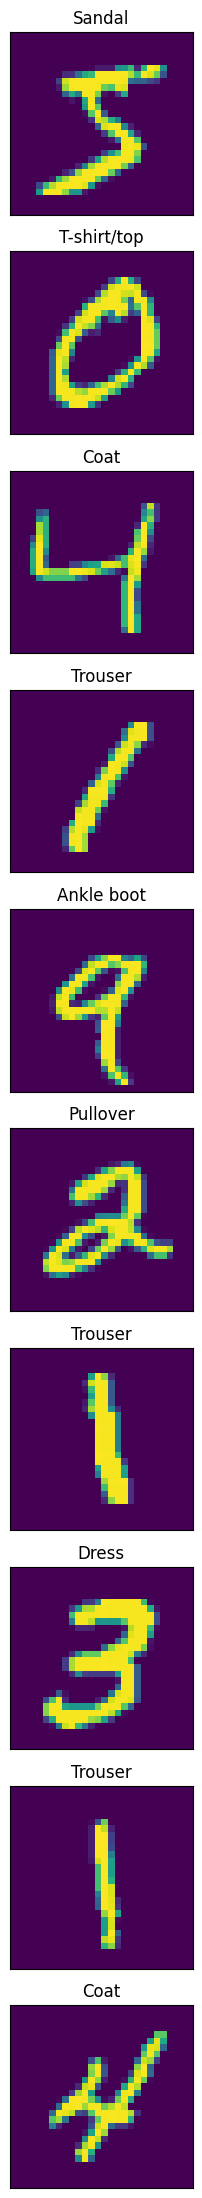

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(10, figsize = (28, 28))
for i in range(10):
  ax[i].imshow(x_train[i])
  ax[i].set_title(f"{labels[y_train_label[i]]}")
  ax[i].set_xticks([])
  ax[i].set_yticks([])

In [25]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

In [27]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [28]:
x_train = x_train.astype('float') / 255
x_test = x_test.astype('float') / 255

In [29]:
image = x_train[0]
print(image.shape)

(28, 28)


In [48]:
def conv(image):
  output_image = np.zeros((26, 26))
  filter = np.random.rand(3, 3)
  for i in range(26):
    for j in range(26):
      for k in range(3):
        for l in range(3):
          output_image[i][j] += image[i + k][j + l] * filter[k][l]
  
  for i in range(26):
    for j in range(26):
      if output_image[i][j] < 0:
        output_image[i][j] = 0
  return output_image

In [51]:
def pool(image):
  output_image = np.zeros((13, 13))
  for i in range(13):
    for j in range(13):
      output_image[i][j] = max([image[2*i][2*j], image[2*i+1][2*j], image[2*i][2*j+1], image[2*i+1][2*j+1]])
  return output_image

In [35]:
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [49]:
conv_layer = conv(image)
print(conv_layer)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.

In [52]:
pool_layer = pool(image)
print(pool_layer)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.07058824 0.07058824 0.53333333 0.68627451 1.         0.96862745
  0.        ]
 [0.         0.         0.         0.19215686 0.99215686 0.99215686
  0.99215686 0.99215686 0.99215686 0.88235294 0.99215686 0.76470588
  0.        ]
 [0.         0.         0.         0.07058824 0.99215686 0.99215686
  0.99215686 0.77647059 0.96862745 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.05490196 0.60392157
  0.99215686 0.00784314 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.04313725
  0.99215686 0.88235294 0.42352941 0.         0.         0.
  0.        ]
 [0.         0